**`Multi-Depot Vehicle Routing Problem`**

In [ ]:
import numpy as np
import copy
class AntColony:
    def __init__(self, distance_matrix, demand, vehicle_capacity, num_ants, num_depots, alpha=1, beta=2, rho=0.5, q=100):
        self.distance_matrix = distance_matrix
        self.pheromone_matrix = np.ones_like(distance_matrix) / distance_matrix.max()
        self.demand = demand
        self.vehicle_capacity = vehicle_capacity
        self.num_ants = num_ants
        self.num_depots = num_depots
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q = q
    def run(self, max_iter):
        best_solution = None
        best_cost = float('inf')
        for _ in range(max_iter):
            solutions = []
            for ant in range(self.num_ants):
                solution = self.construct_solution()
                cost = self.calculate_cost(solution)
                solutions.append((solution, cost))
                if cost < best_cost:
                    best_solution = copy.deepcopy(solution)
                    best_cost = cost
            self.update_pheromones(solutions)
        return best_solution, best_cost
    def construct_solution(self):
        solution = []
        for depot in range(self.num_depots):
            remaining_nodes = list(range(self.distance_matrix.shape[0]))
            current_node = np.random.choice(remaining_nodes)
            remaining_nodes.remove(current_node)
            route = [current_node]
            current_capacity = 0
            while remaining_nodes:
                next_node = self.select_next_node(current_node, remaining_nodes, current_capacity)
                route.append(next_node)
                current_node = next_node
                remaining_nodes.remove(next_node)
                current_capacity += self.demand[next_node]
                if current_capacity > self.vehicle_capacity:
                    solution.append(route)
                    route = [current_node]
                    current_capacity = self.demand[current_node]
            solution.append(route)
        return solution
    def select_next_node(self, current_node, remaining_nodes, current_capacity):
        probabilities = self.calculate_probabilities(current_node, remaining_nodes, current_capacity)
        return np.random.choice(remaining_nodes, p=probabilities)
    def calculate_probabilities(self, current_node, remaining_nodes, current_capacity):
        pheromones = self.pheromone_matrix[current_node, remaining_nodes]
        distances = 1 / (self.distance_matrix[current_node, remaining_nodes] + 1e-10)
        demand_factors = self.demand[remaining_nodes] / (self.vehicle_capacity - current_capacity + 1e-10)
        demand_factors[demand_factors <= 0] = 1e-10
        attractiveness = np.power(pheromones, self.alpha) * np.power(distances, self.beta) / demand_factors
        probabilities = attractiveness / attractiveness.sum()
        return probabilities
    def calculate_cost(self, solution):
        total_cost = 0
        for route in solution:
            route_cost = sum(self.distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))
            total_cost += route_cost
        return total_cost
    def update_pheromones(self, solutions):
        self.pheromone_matrix *= (1 - self.rho)
        for solution, cost in solutions:
            for route in solution:
                for i in range(len(route) - 1):
                    node1, node2 = route[i], route[i + 1]
                    self.pheromone_matrix[node1, node2] += self.q / cost
if __name__ == "__main__":
    distance_matrix = np.array([
        [0, 10, 15, 20],
        [10, 0, 35, 25],
        [15, 35, 0, 30],
        [20, 25, 30, 0]
    ])
    demand = np.array([0, 10, 20, 30])
    vehicle_capacity = 50
    num_ants = 5
    num_depots = 2
    alpha = 1
    beta = 2
    rho = 0.5
    q = 100
    ant_colony = AntColony(distance_matrix, demand, vehicle_capacity, num_ants, num_depots, alpha, beta, rho, q)
    best_solution, best_cost = ant_colony.run(max_iter=100)
    print("Best Solution =", best_solution)
    print("Best Cost =", best_cost)

Best Solution = [[2, 0, 1, 3], [2, 0, 1, 3]]
Best Cost = 100


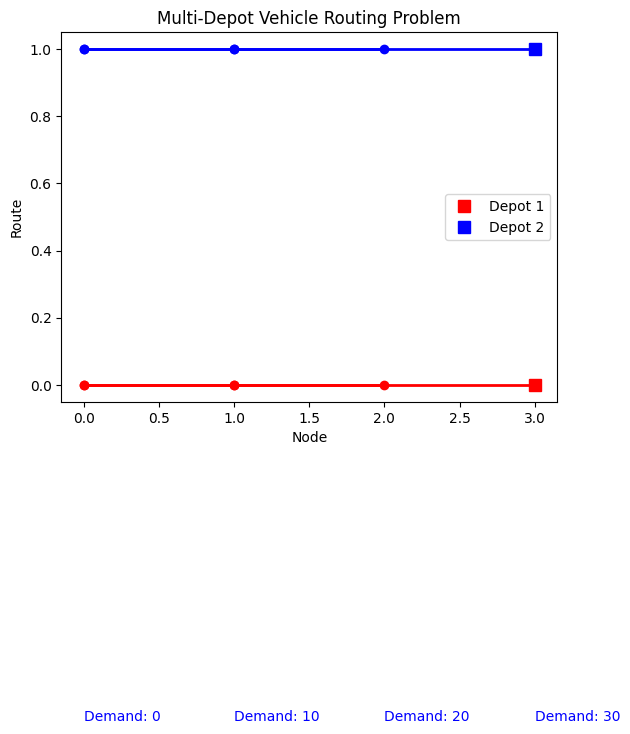

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import copy
class AntColony:
    def __init__(self, distance_matrix, demand, vehicle_capacity, num_ants, num_depots, alpha=1, beta=2, rho=0.5, q=100):
        self.distance_matrix = distance_matrix
        self.pheromone_matrix = np.ones_like(distance_matrix) / distance_matrix.max()
        self.demand = demand
        self.vehicle_capacity = vehicle_capacity
        self.num_ants = num_ants
        self.num_depots = num_depots
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q = q
    def run(self, max_iter):
        best_solution = None
        best_cost = float('inf')
        for _ in range(max_iter):
            solutions = []
            for ant in range(self.num_ants):
                solution = self.construct_solution()
                cost = self.calculate_cost(solution)
                solutions.append((solution, cost))
                if cost < best_cost:
                    best_solution = copy.deepcopy(solution)
                    best_cost = cost
            self.update_pheromones(solutions)
        return best_solution, best_cost
    def construct_solution(self):
        solution = []
        for depot in range(self.num_depots):
            remaining_nodes = list(range(self.distance_matrix.shape[0]))
            current_node = np.random.choice(remaining_nodes)
            remaining_nodes.remove(current_node)
            route = [current_node]
            current_capacity = 0
            while remaining_nodes:
                next_node = self.select_next_node(current_node, remaining_nodes, current_capacity)
                route.append(next_node)
                current_node = next_node
                remaining_nodes.remove(next_node)
                current_capacity += self.demand[next_node]
                if current_capacity > self.vehicle_capacity:
                    solution.append(route)
                    route = [current_node]
                    current_capacity = self.demand[current_node]
            solution.append(route)
        return solution
    def select_next_node(self, current_node, remaining_nodes, current_capacity):
        probabilities = self.calculate_probabilities(current_node, remaining_nodes, current_capacity)
        return np.random.choice(remaining_nodes, p=probabilities)
    def calculate_probabilities(self, current_node, remaining_nodes, current_capacity):
        pheromones = self.pheromone_matrix[current_node, remaining_nodes]
        distances = 1 / (self.distance_matrix[current_node, remaining_nodes] + 1e-10)
        demand_factors = self.demand[remaining_nodes] / (self.vehicle_capacity - current_capacity + 1e-10)
        demand_factors[demand_factors <= 0] = 1e-10
        attractiveness = np.power(pheromones, self.alpha) * np.power(distances, self.beta) / demand_factors
        probabilities = attractiveness / attractiveness.sum()
        return probabilities
    def calculate_cost(self, solution):
        total_cost = 0
        for route in solution:
            route_cost = sum(self.distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))
            total_cost += route_cost
        return total_cost
    def update_pheromones(self, solutions):
        self.pheromone_matrix *= (1 - self.rho)
        for solution, cost in solutions:
            for route in solution:
                for i in range(len(route) - 1):
                    node1, node2 = route[i], route[i + 1]
                    self.pheromone_matrix[node1, node2] += self.q / cost
    def plot_solution(self, solution):
        depots_colors = ['red', 'blue', 'green', 'purple', 'orange']
        nodes_colors = ['black'] * self.distance_matrix.shape[0]
        for i, route in enumerate(solution):
            for j in range(len(route) - 1):
                node1, node2 = route[j], route[j + 1]
                plt.plot([node1, node2], [i, i], color=depots_colors[i], linewidth=2, marker='o')
                if j == len(route) - 2:
                    plt.plot(node2, i, 's', color=depots_colors[i], markersize=8, label=f'Depot {i + 1}')
                nodes_colors[node1] = depots_colors[i]
                nodes_colors[node2] = depots_colors[i]
        for node in range(self.distance_matrix.shape[0]):
            plt.text(node, -1, f'Demand: {self.demand[node]}', color=nodes_colors[node])
        plt.xlabel('Node')
        plt.ylabel('Route')
        plt.title('Multi-Depot Vehicle Routing Problem')
        plt.legend()
        plt.show()
if __name__ == "__main__":
    distance_matrix = np.array([
        [0, 10, 15, 20],
        [10, 0, 35, 25],
        [15, 35, 0, 30],
        [20, 25, 30, 0]
    ])
    demand = np.array([0, 10, 20, 30])
    vehicle_capacity = 50
    num_ants = 5
    num_depots = 2
    alpha = 1
    beta = 2
    rho = 0.5
    q = 100
    ant_colony = AntColony(distance_matrix, demand, vehicle_capacity, num_ants, num_depots, alpha, beta, rho, q)
    best_solution, best_cost = ant_colony.run(max_iter=100)
    ant_colony.plot_solution(best_solution)

In [ ]:
# This code produces animation of iterations.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import copy
class AntColony:
    def __init__(self, distance_matrix, demand, vehicle_capacity, num_ants, num_depots, alpha=1, beta=2, rho=0.5, q=100):
        self.distance_matrix = distance_matrix
        self.pheromone_matrix = np.ones_like(distance_matrix) / distance_matrix.max()
        self.demand = demand
        self.vehicle_capacity = vehicle_capacity
        self.num_ants = num_ants
        self.num_depots = num_depots
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q = q
    def run(self, max_iter):
        best_solution = None
        best_cost = float('inf')
        for _ in range(max_iter):
            solutions = []
            for ant in range(self.num_ants):
                solution = self.construct_solution()
                cost = self.calculate_cost(solution)
                solutions.append((solution, cost))
                if cost < best_cost:
                    best_solution = copy.deepcopy(solution)
                    best_cost = cost
            self.update_pheromones(solutions)
        return best_solution, best_cost
    def construct_solution(self):
        solution = []
        for depot in range(self.num_depots):
            remaining_nodes = list(range(self.distance_matrix.shape[0]))
            current_node = np.random.choice(remaining_nodes)
            remaining_nodes.remove(current_node)
            route = [current_node]
            current_capacity = 0
            while remaining_nodes:
                next_node = self.select_next_node(current_node, remaining_nodes, current_capacity)
                route.append(next_node)
                current_node = next_node
                remaining_nodes.remove(next_node)
                current_capacity += self.demand[next_node]
                if current_capacity > self.vehicle_capacity:
                    solution.append(route)
                    route = [current_node]
                    current_capacity = self.demand[current_node]
            solution.append(route)
        return solution
    def select_next_node(self, current_node, remaining_nodes, current_capacity):
        probabilities = self.calculate_probabilities(current_node, remaining_nodes, current_capacity)
        return np.random.choice(remaining_nodes, p=probabilities)
    def calculate_probabilities(self, current_node, remaining_nodes, current_capacity):
        pheromones = self.pheromone_matrix[current_node, remaining_nodes]
        distances = 1 / (self.distance_matrix[current_node, remaining_nodes] + 1e-10)
        demand_factors = self.demand[remaining_nodes] / (self.vehicle_capacity - current_capacity + 1e-10)
        demand_factors[demand_factors <= 0] = 1e-10
        attractiveness = np.power(pheromones, self.alpha) * np.power(distances, self.beta) / demand_factors
        probabilities = attractiveness / attractiveness.sum()
        return probabilities
    def calculate_cost(self, solution):
        total_cost = 0
        for route in solution:
            route_cost = sum(self.distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))
            total_cost += route_cost
        return total_cost
    def update_pheromones(self, solutions):
        self.pheromone_matrix *= (1 - self.rho)
        for solution, cost in solutions:
            for route in solution:
                for i in range(len(route) - 1):
                    node1, node2 = route[i], route[i + 1]
                    self.pheromone_matrix[node1, node2] += self.q / cost
    def plot_iteration(self, iteration, solution):
        plt.clf()
        depots_colors = ['red', 'blue', 'green', 'purple', 'orange']  # Change colors as needed
        nodes_colors = ['black'] * self.distance_matrix.shape[0]
        for i, route in enumerate(solution):
            for j in range(len(route) - 1):
                node1, node2 = route[j], route[j + 1]
                plt.plot([node1, node2], [i, i], color=depots_colors[i], linewidth=2, marker='o')
                if j == len(route) - 2:
                    plt.plot(node2, i, 's', color=depots_colors[i], markersize=8, label=f'Depot {i + 1}')
                nodes_colors[node1] = depots_colors[i]
                nodes_colors[node2] = depots_colors[i]
        for node in range(self.distance_matrix.shape[0]):
            plt.text(node, -1, f'Demand: {self.demand[node]}', color=nodes_colors[node])
        plt.xlabel('Node')
        plt.ylabel('Route')
        plt.title(f'MDVRP Solution - Iteration {iteration}')
        plt.legend()
        plt.draw()
        plt.pause(0.1)
if __name__ == "__main__":
    distance_matrix = np.array([
        [0, 10, 15, 20],
        [10, 0, 35, 25],
        [15, 35, 0, 30],
        [20, 25, 30, 0]
    ])
    demand = np.array([0, 10, 20, 30]
    vehicle_capacity = 50
    num_ants = 5
    num_depots = 2
    alpha = 1
    beta = 2
    rho = 0.5
    q = 100
    ant_colony = AntColony(distance_matrix, demand, vehicle_capacity, num_ants, num_depots, alpha, beta, rho, q)
    fig = plt.figure()
    ani = FuncAnimation(fig, lambda i: ant_colony.plot_iteration(i, ant_colony.construct_solution()), frames=50, interval=200)
    plt.show()

<Figure size 640x480 with 0 Axes>

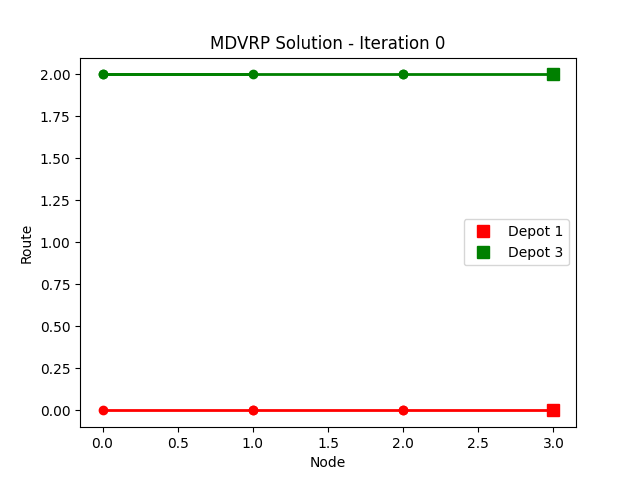

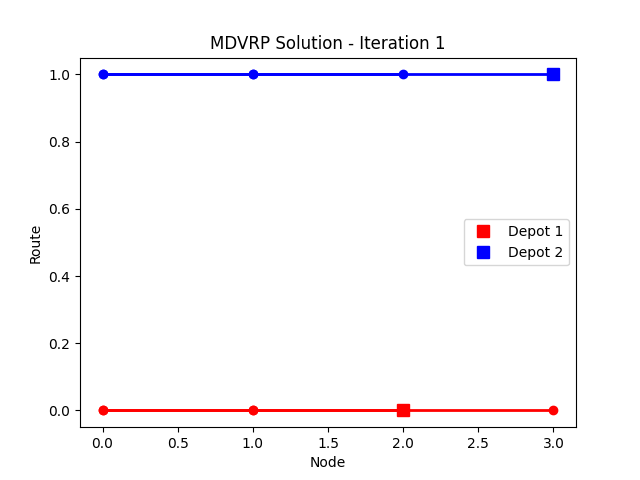

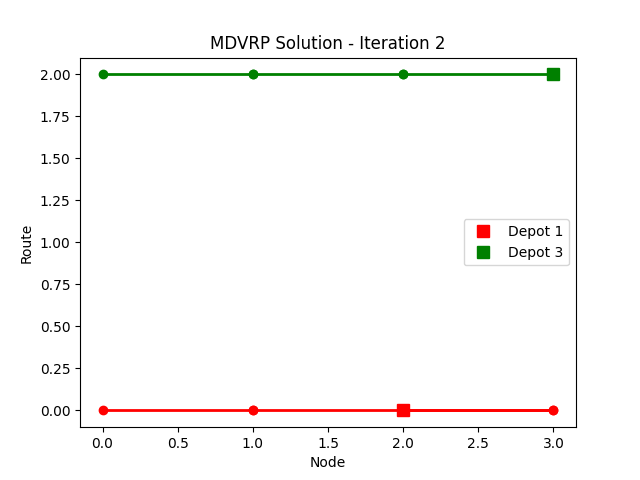

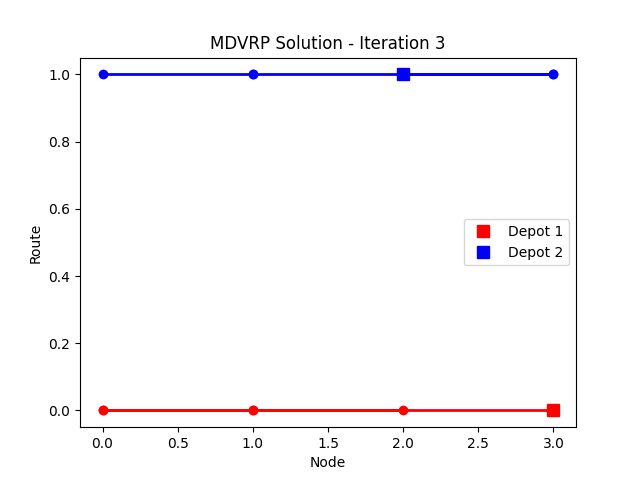

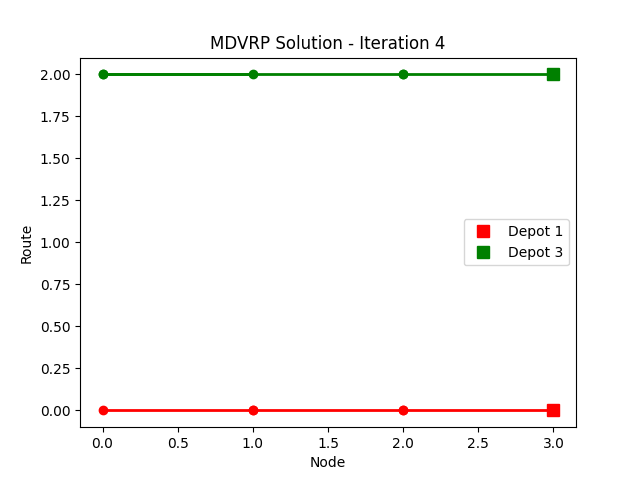

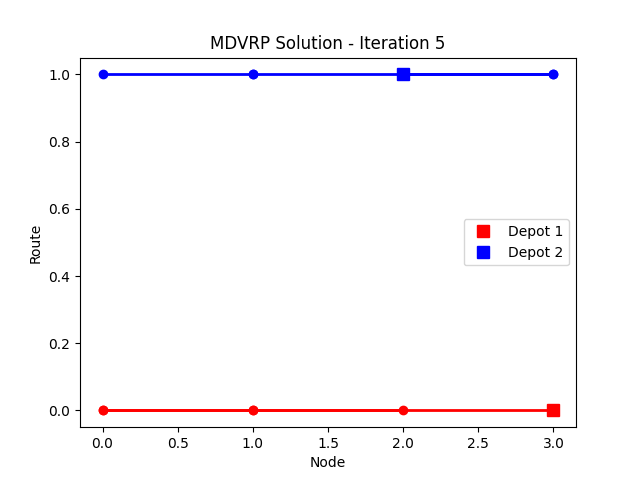

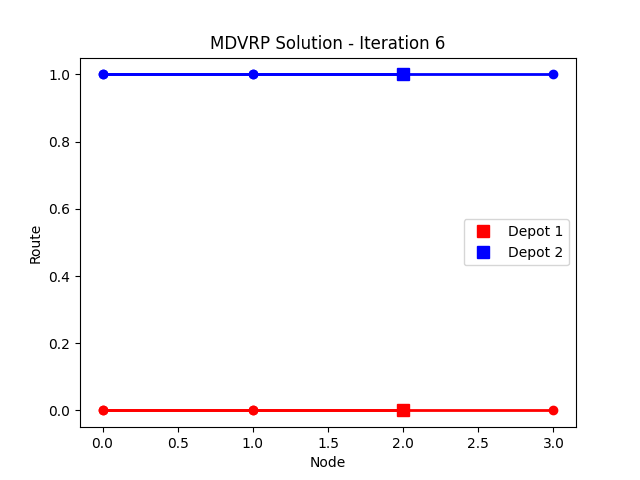

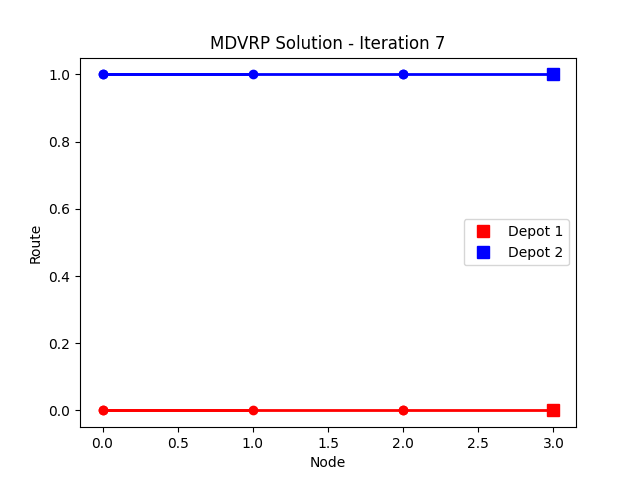

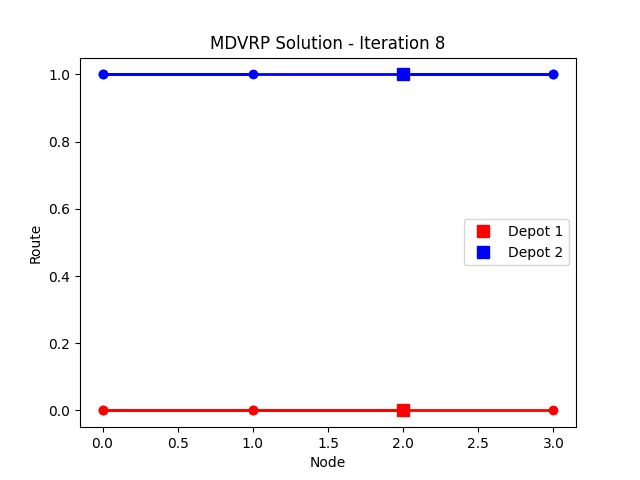

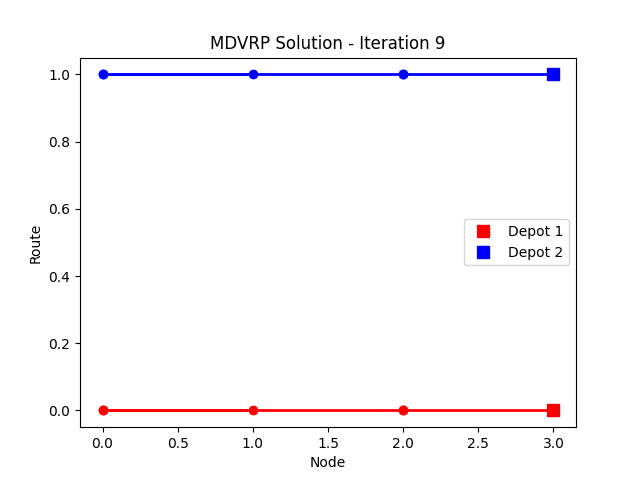

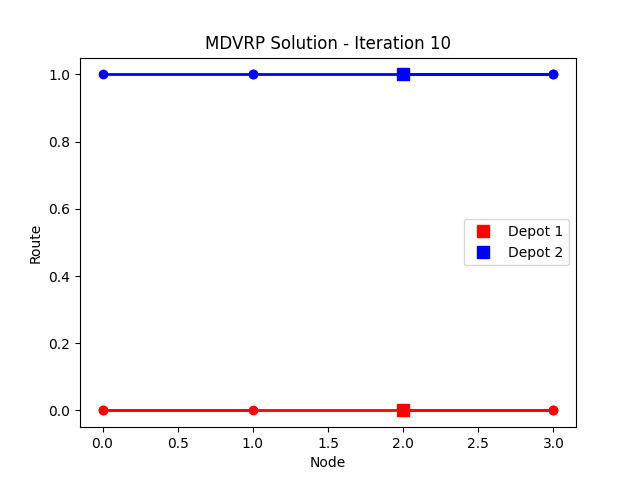

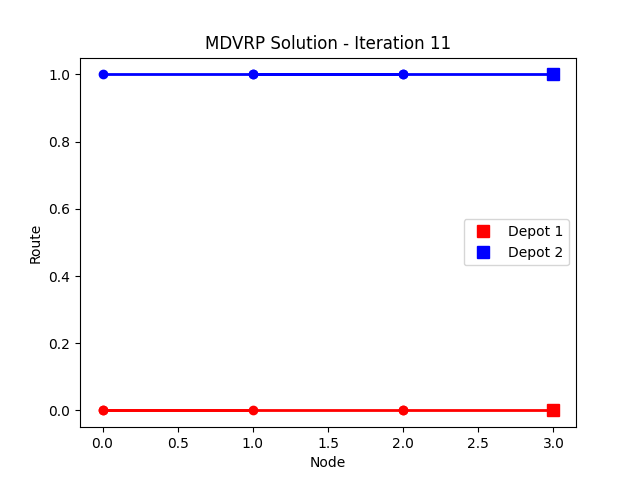

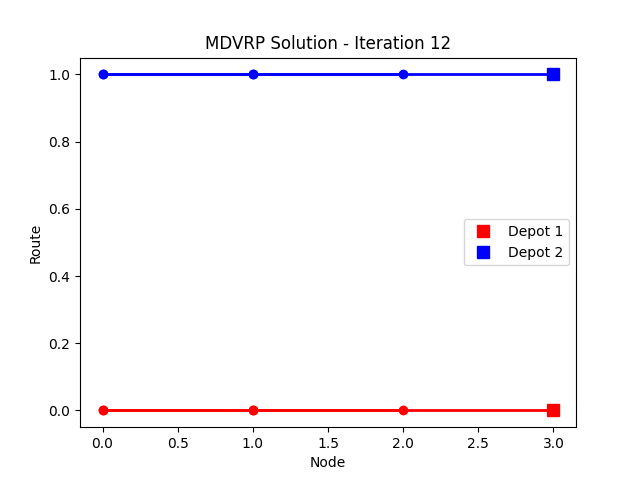

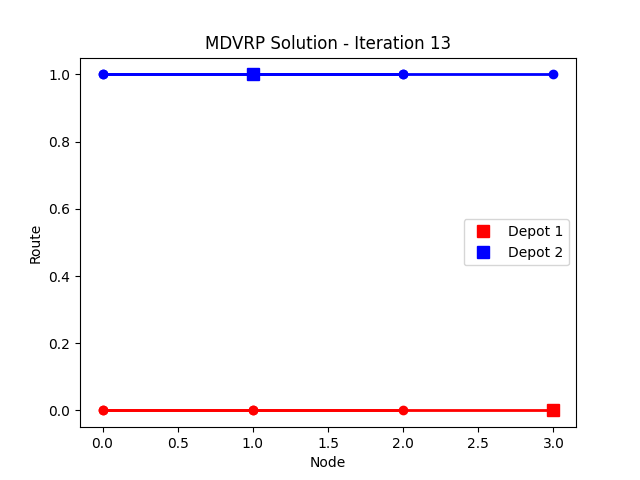

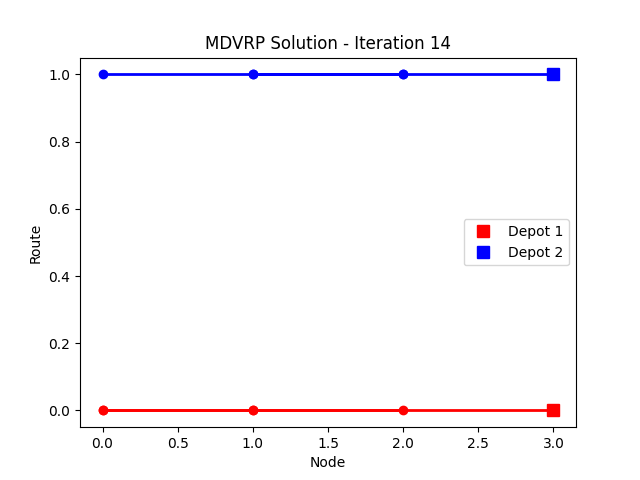

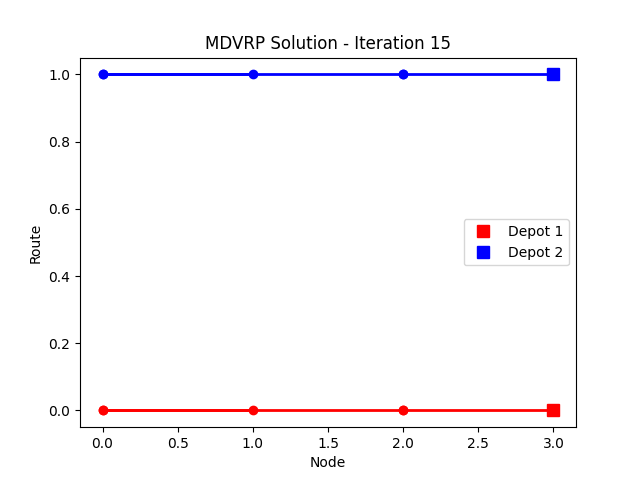

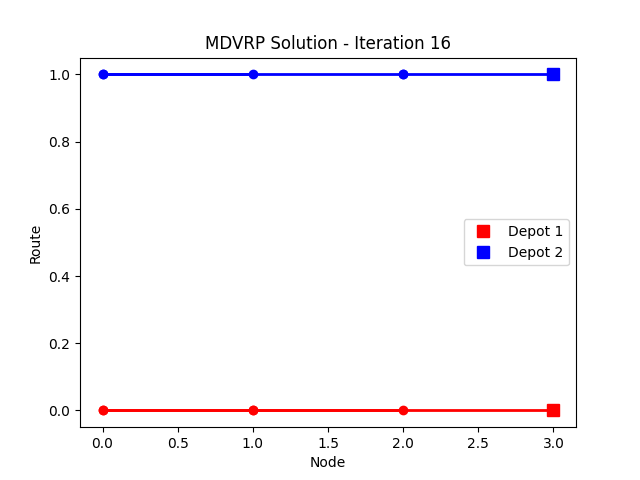

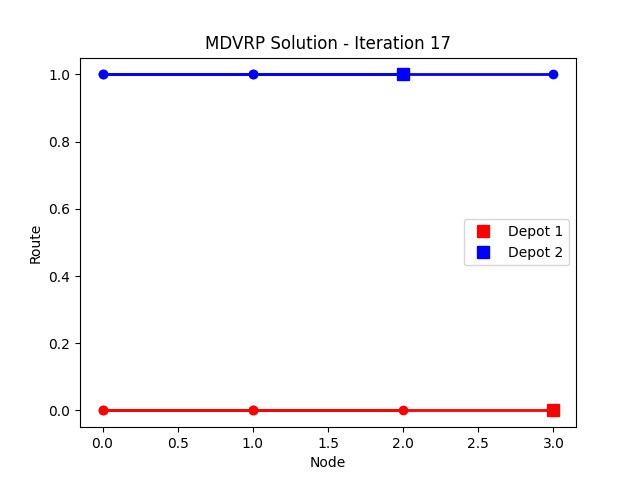

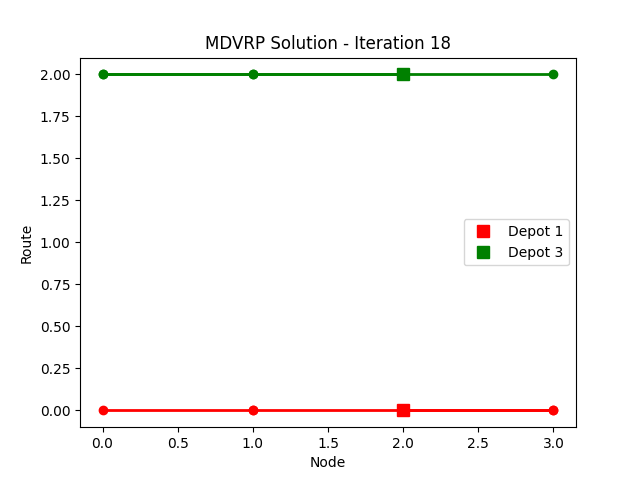

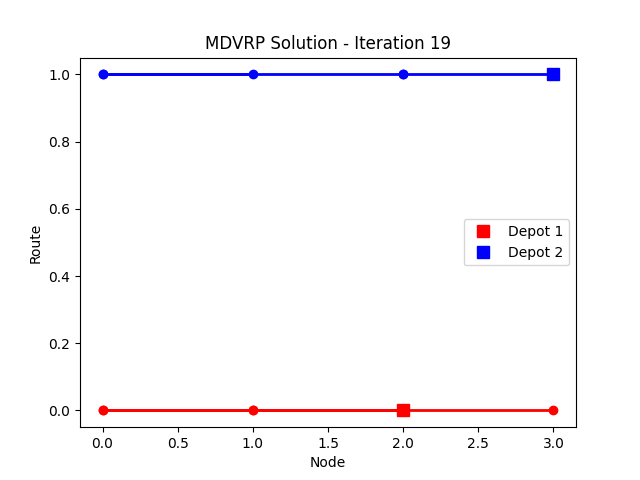

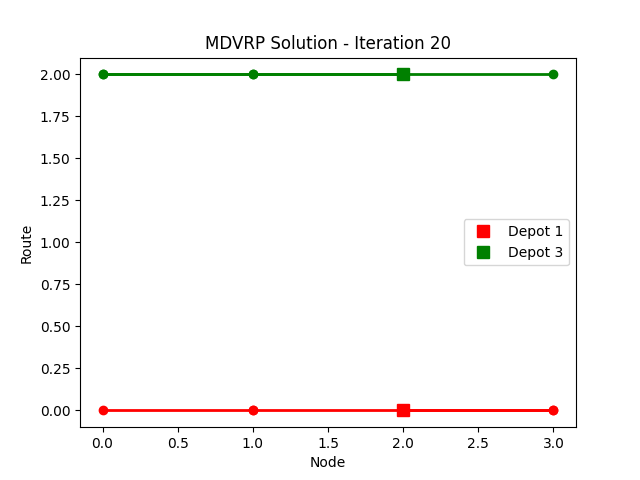

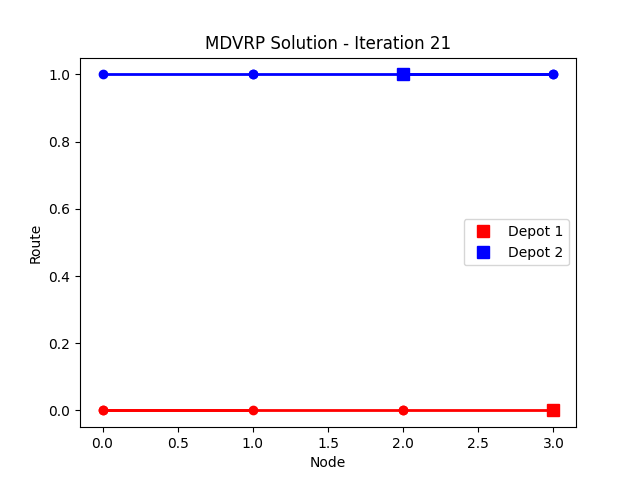

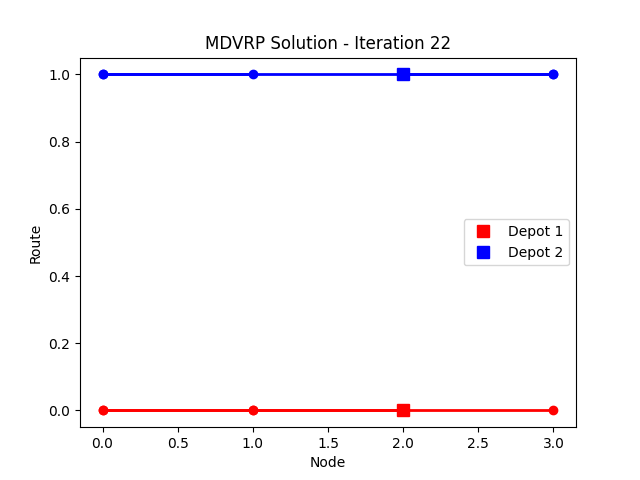

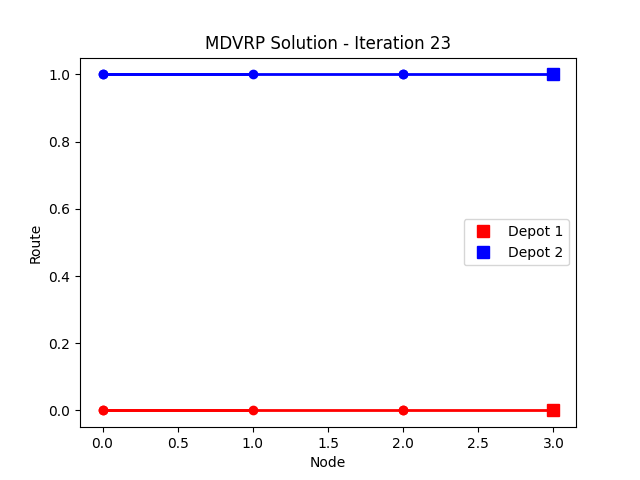

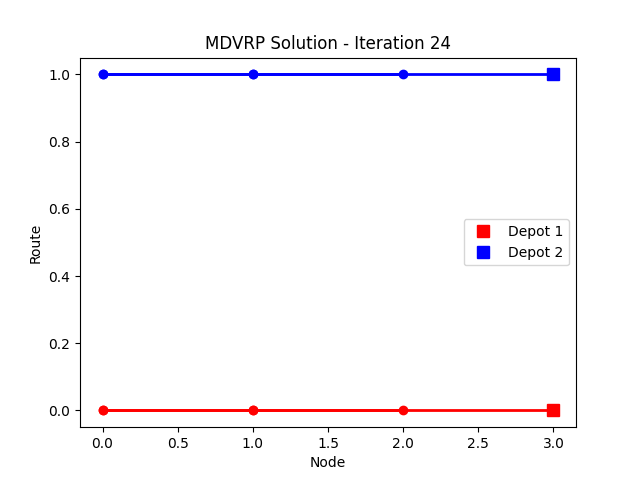

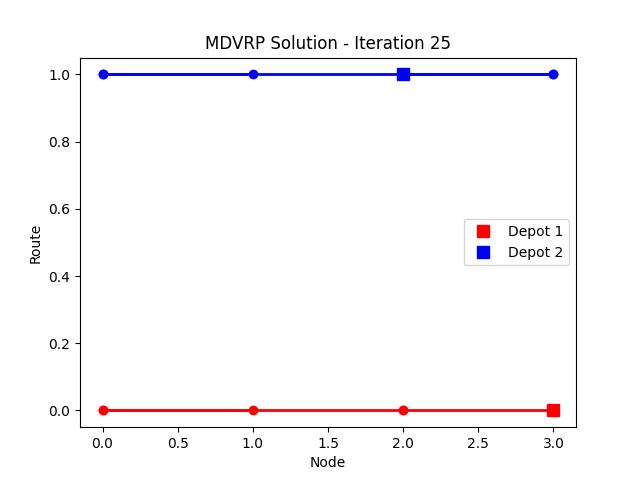

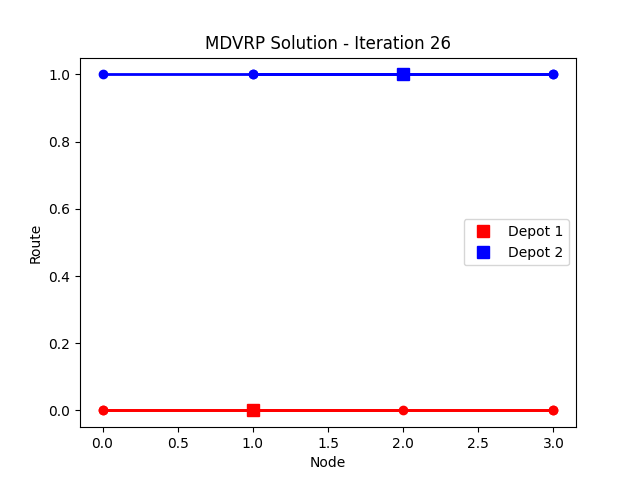

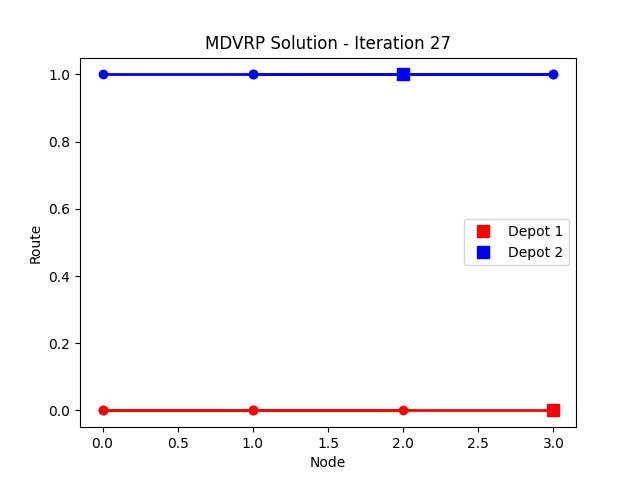

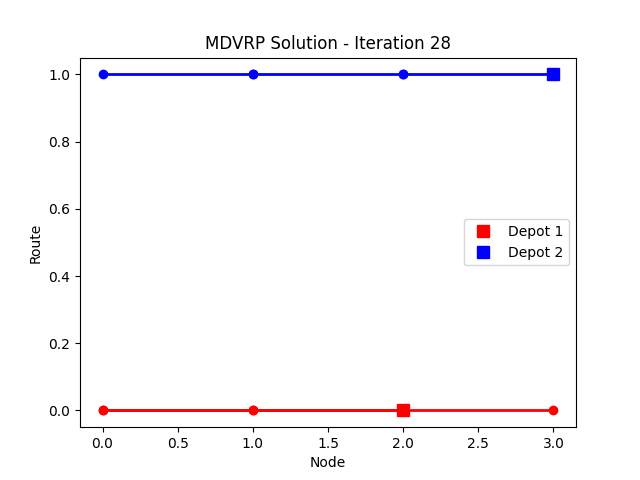

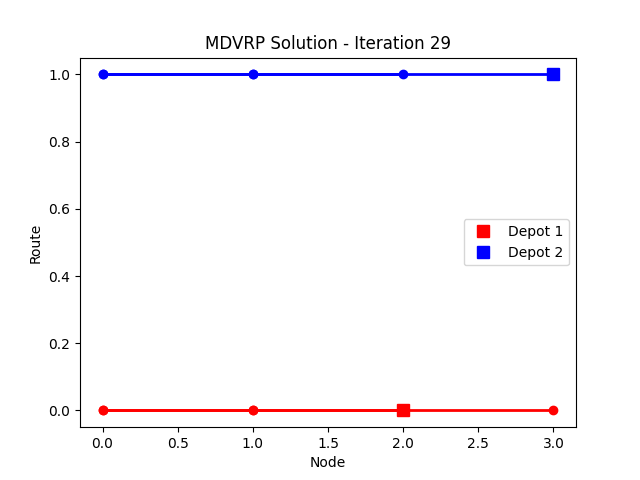

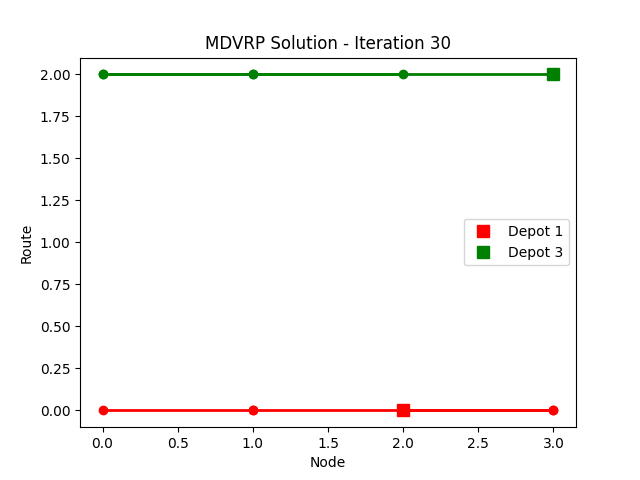

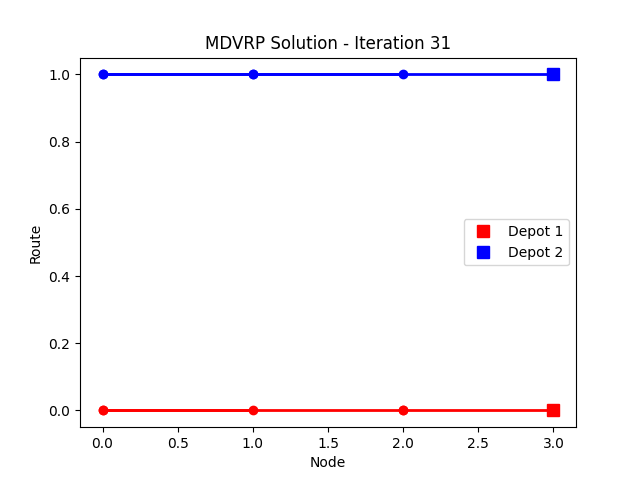

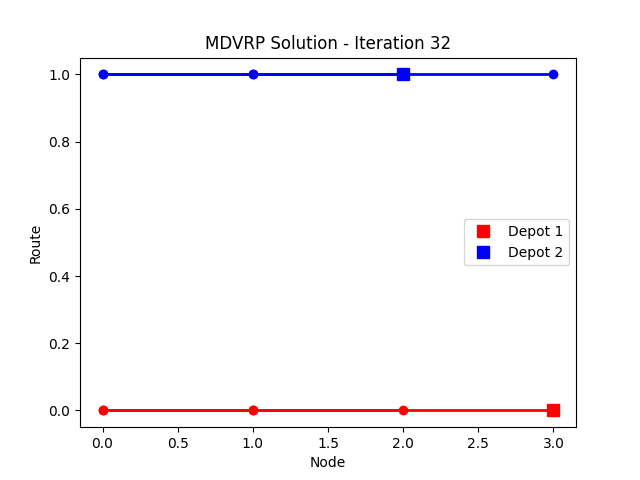

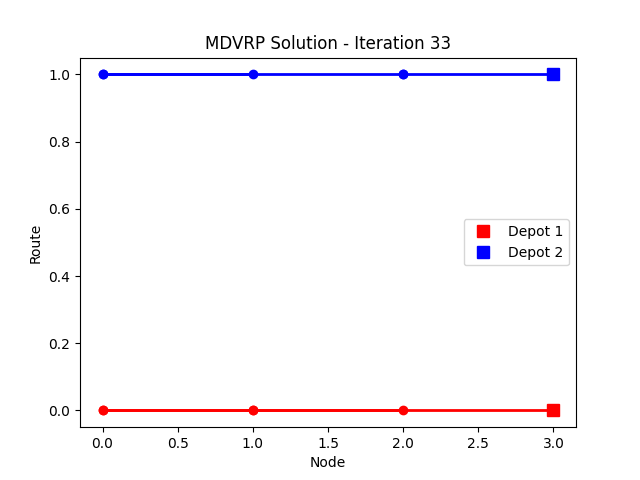

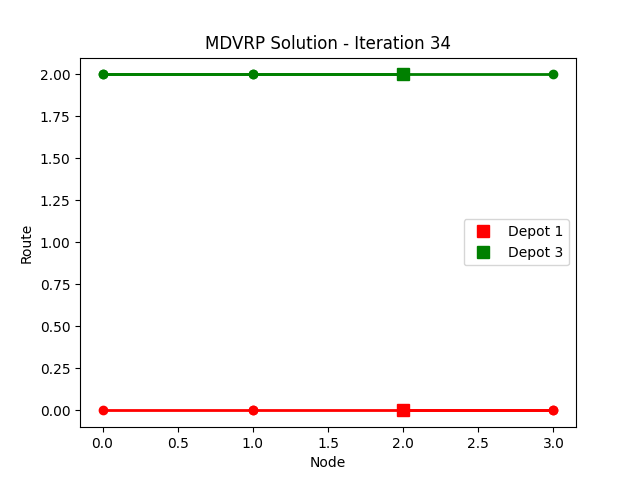

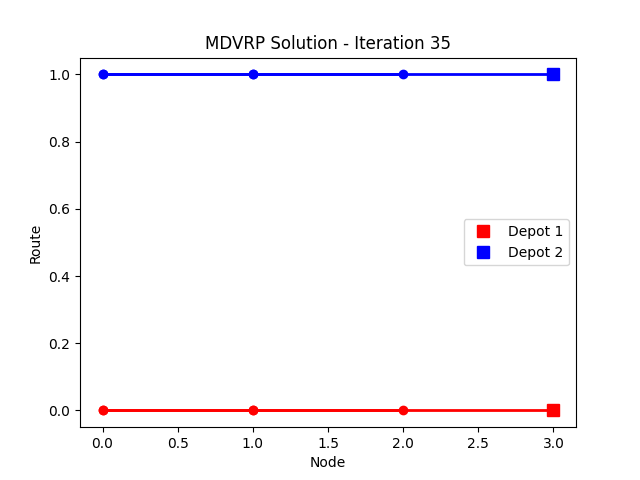

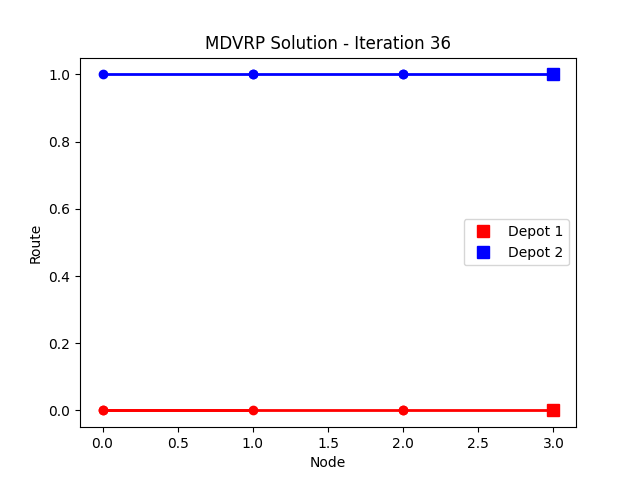

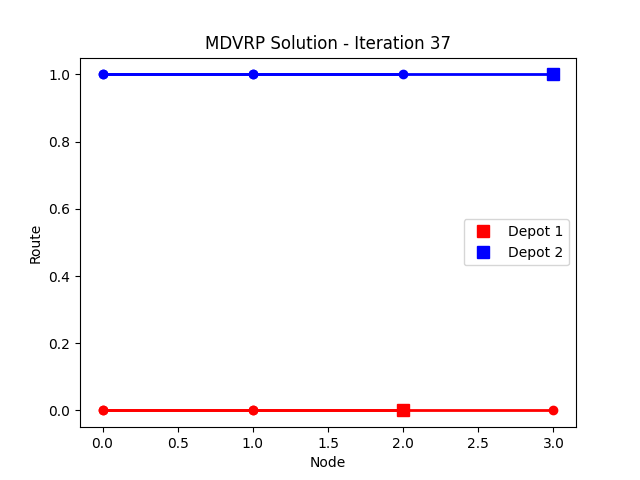

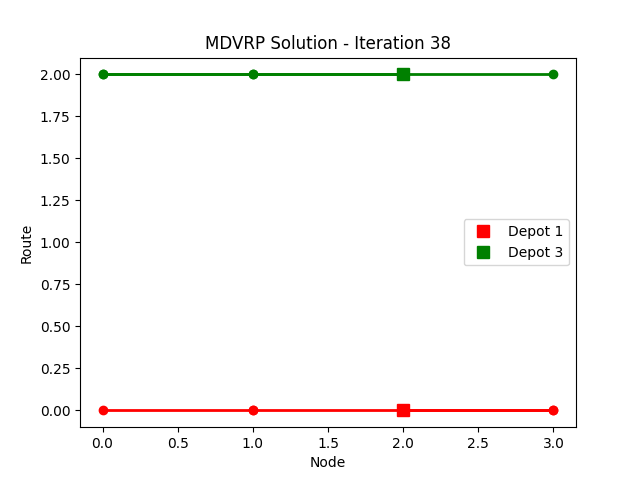

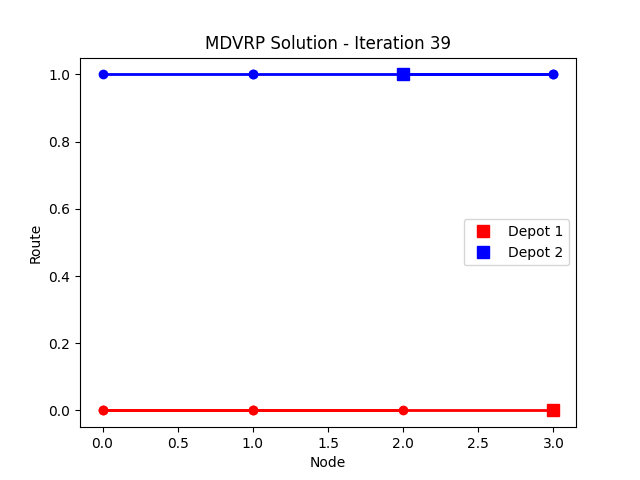

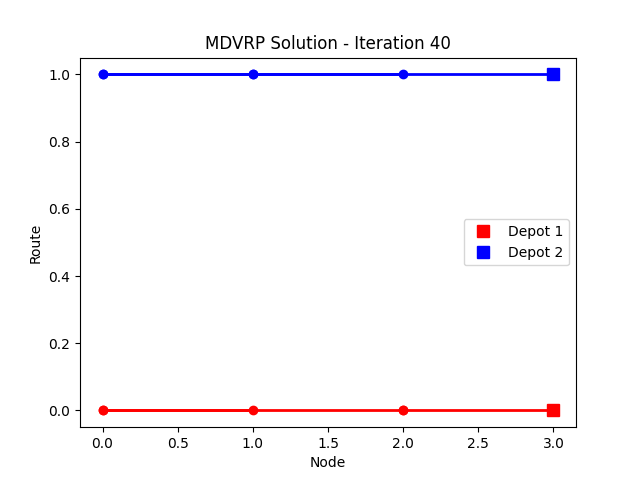

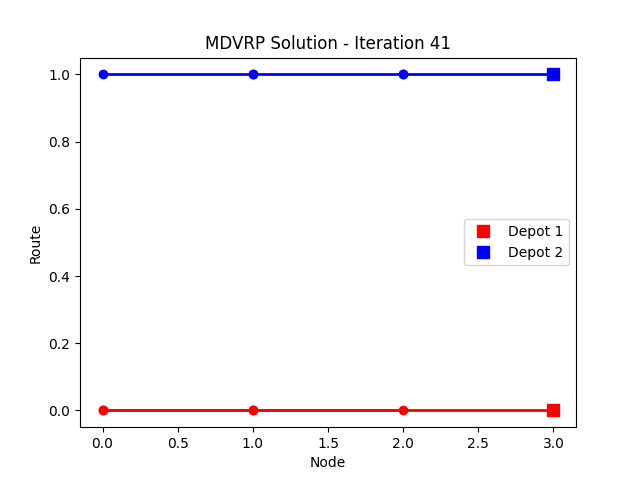

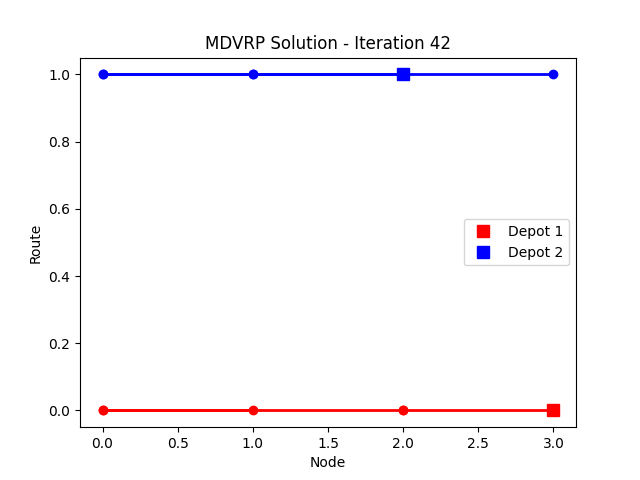

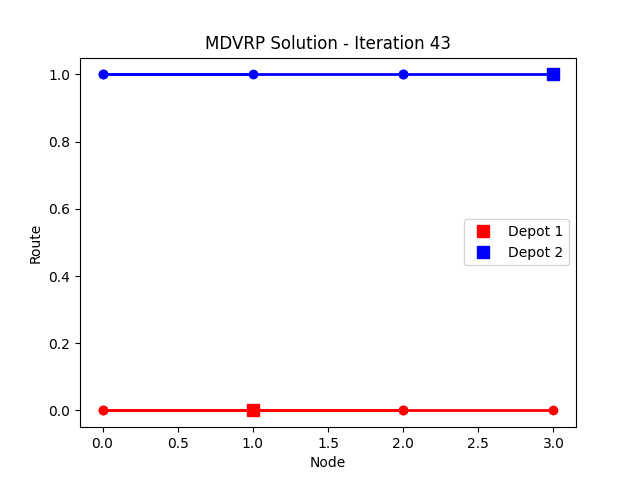

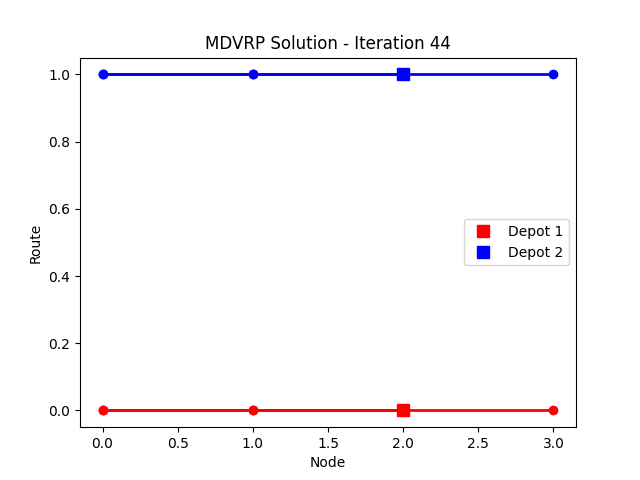

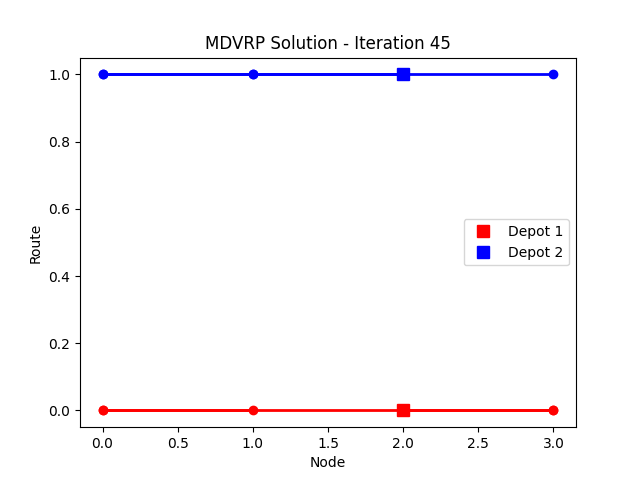

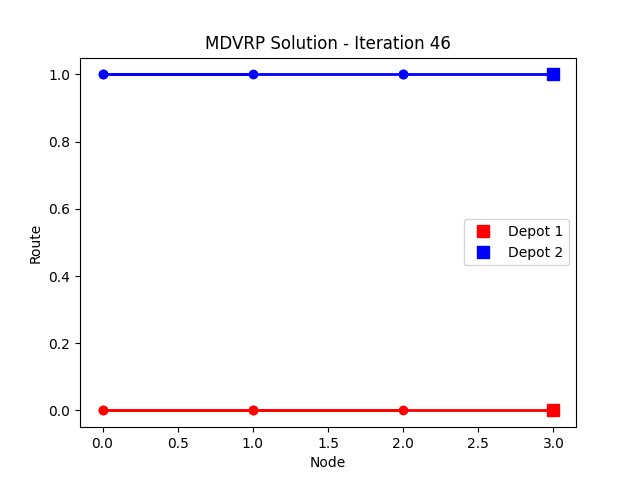

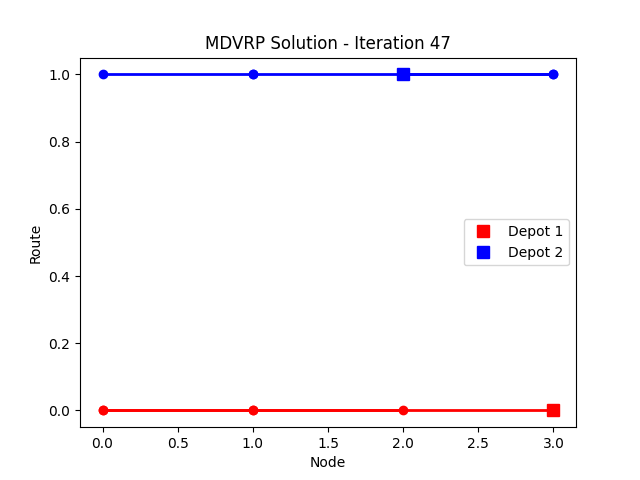

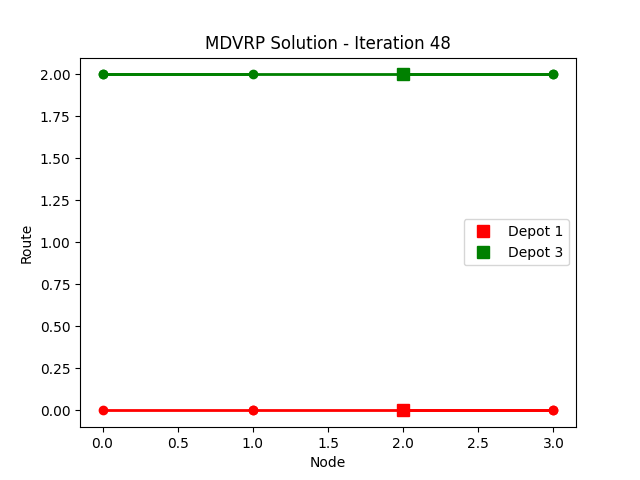

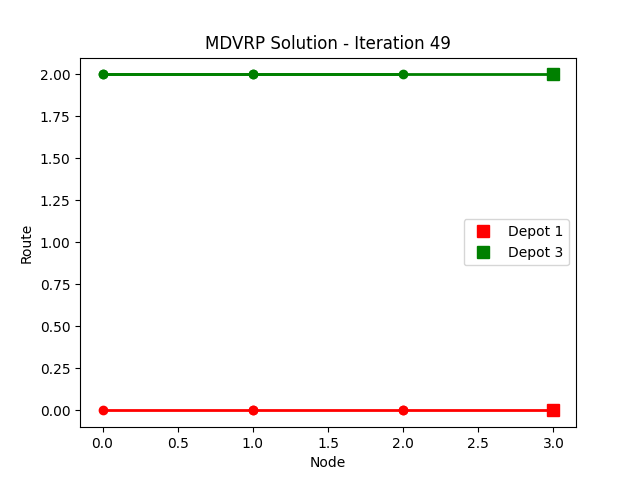

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import copy
from IPython.display import display, Image
class AntColony:
    def __init__(self, distance_matrix, demand, vehicle_capacity, num_ants, num_depots, alpha=1, beta=2, rho=0.5, q=100):
        self.distance_matrix = distance_matrix
        self.pheromone_matrix = np.ones_like(distance_matrix) / distance_matrix.max()
        self.demand = demand
        self.vehicle_capacity = vehicle_capacity
        self.num_ants = num_ants
        self.num_depots = num_depots
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q = q
    def run(self, max_iter):
        best_solution = None
        best_cost = float('inf')
        for _ in range(max_iter):
            solutions = []
            for ant in range(self.num_ants):
                solution = self.construct_solution()
                cost = self.calculate_cost(solution)
                solutions.append((solution, cost))
                if cost < best_cost:
                    best_solution = copy.deepcopy(solution)
                    best_cost = cost
            self.update_pheromones(solutions)
        return best_solution, best_cost
    def construct_solution(self):
        solution = []
        for depot in range(self.num_depots):
            remaining_nodes = list(range(self.distance_matrix.shape[0]))
            current_node = np.random.choice(remaining_nodes)
            remaining_nodes.remove(current_node)
            route = [current_node]
            current_capacity = 0
            while remaining_nodes:
                next_node = self.select_next_node(current_node, remaining_nodes, current_capacity)
                route.append(next_node)
                current_node = next_node
                remaining_nodes.remove(next_node)
                current_capacity += self.demand[next_node]
                if current_capacity > self.vehicle_capacity:
                    solution.append(route)
                    route = [current_node]
                    current_capacity = self.demand[current_node]
            solution.append(route)
        return solution
    def select_next_node(self, current_node, remaining_nodes, current_capacity):
        probabilities = self.calculate_probabilities(current_node, remaining_nodes, current_capacity)
        return np.random.choice(remaining_nodes, p=probabilities)
    def calculate_probabilities(self, current_node, remaining_nodes, current_capacity):
        pheromones = self.pheromone_matrix[current_node, remaining_nodes]
        distances = 1 / (self.distance_matrix[current_node, remaining_nodes] + 1e-10)
        demand_factors = self.demand[remaining_nodes] / (self.vehicle_capacity - current_capacity + 1e-10)
        demand_factors[demand_factors <= 0] = 1e-10
        attractiveness = np.power(pheromones, self.alpha) * np.power(distances, self.beta) / demand_factors
        probabilities = attractiveness / attractiveness.sum()
        return probabilities
    def calculate_cost(self, solution):
        total_cost = 0
        for route in solution:
            route_cost = sum(self.distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1))
            total_cost += route_cost
        return total_cost
    def update_pheromones(self, solutions):
        self.pheromone_matrix *= (1 - self.rho)
        for solution, cost in solutions:
            for route in solution:
                for i in range(len(route) - 1):
                    node1, node2 = route[i], route[i + 1]
                    self.pheromone_matrix[node1, node2] += self.q / cost
    def plot_iteration(self, iteration, solution, save_images=False):
        plt.clf()
        depots_colors = ['red', 'blue', 'green', 'purple', 'orange']
        nodes_colors = ['black'] * self.distance_matrix.shape[0]
        for i, route in enumerate(solution):
            for j in range(len(route) - 1):
                node1, node2 = route[j], route[j + 1]
                plt.plot([node1, node2], [i, i], color=depots_colors[i], linewidth=2, marker='o')
                if j == len(route) - 2:
                    plt.plot(node2, i, 's', color=depots_colors[i], markersize=8, label=f'Depot {i + 1}')
                nodes_colors[node1] = depots_colors[i]
                nodes_colors[node2] = depots_colors[i]
        for node in range(self.distance_matrix.shape[0]):
            plt.text(node, -1, f'Demand: {self.demand[node]}', color=nodes_colors[node])
        plt.xlabel('Node')
        plt.ylabel('Route')
        plt.title(f'MDVRP Solution - Iteration {iteration}')
        plt.legend()
        if save_images:
            plt.savefig(f'iteration_{iteration:03d}.png')
            plt.close()
        else:
            plt.show()
if __name__ == "__main__":
    distance_matrix = np.array([
        [0, 10, 15, 20],
        [10, 0, 35, 25],
        [15, 35, 0, 30],
        [20, 25, 30, 0]
    ])
    demand = np.array([0, 10, 20, 30])
    vehicle_capacity = 50
    num_ants = 5
    num_depots = 2
    alpha = 1
    beta = 2
    rho = 0.5
    q = 100
    ant_colony = AntColony(distance_matrix, demand, vehicle_capacity, num_ants, num_depots, alpha, beta, rho, q)
    fig = plt.figure()
    ani = FuncAnimation(fig, lambda i: ant_colony.plot_iteration(i, ant_colony.construct_solution(), save_images=True), frames=50, interval=200)
    plt.show()
    for iteration in range(50):
        img_path = f'iteration_{iteration:03d}.png'
        img = Image(filename=img_path)
        display(img)